# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Basic preview
print("Train data:")
print(train.head())

print("\nTest data:")
print(test.head())

# Info about data
print("\nTrain info:")
print(train.info())

print("\nTest info:")
print(test.info())

print("\nTrain describe:")
print(train.describe())




Train data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

/tmp/ipython-input-4185519986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette="Set1")


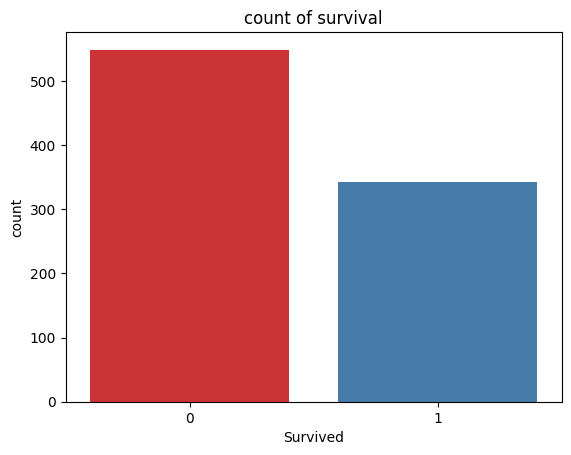

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [2]:
### Survived Overall
sns.countplot(x='Survived', data=train, palette="Set1")
plt.title('count of survival')
plt.show()

print(train['Survived'].value_counts(normalize=True))

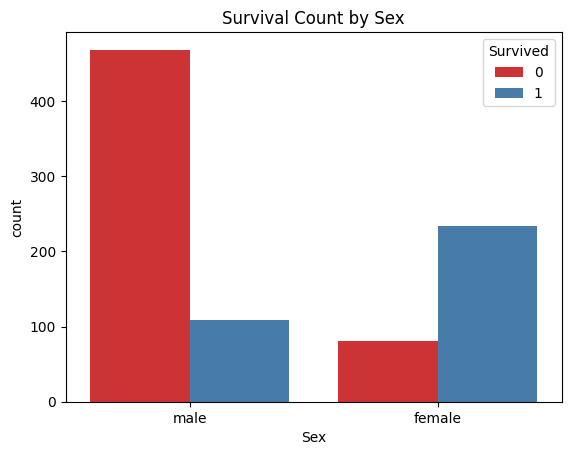

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [3]:
### Survival by sex
sns.countplot(x='Sex',hue='Survived', data=train, palette="Set1")
plt.title('Survival Count by Sex')
plt.show()

print(train.groupby('Sex')['Survived'].mean())

Females usually have a much higher survival rate because they are the priority in lifeboats.

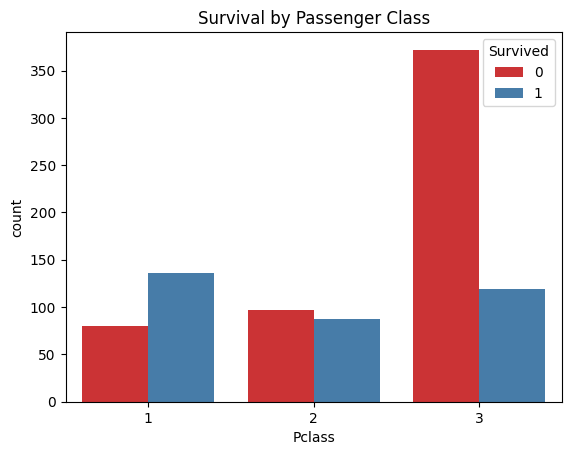

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [4]:
### Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train, palette="Set1")
plt.title('Survival by Passenger Class')
plt.show()

print(train.groupby('Pclass')['Survived'].mean())

First class passengers survived more than second and third class passengers

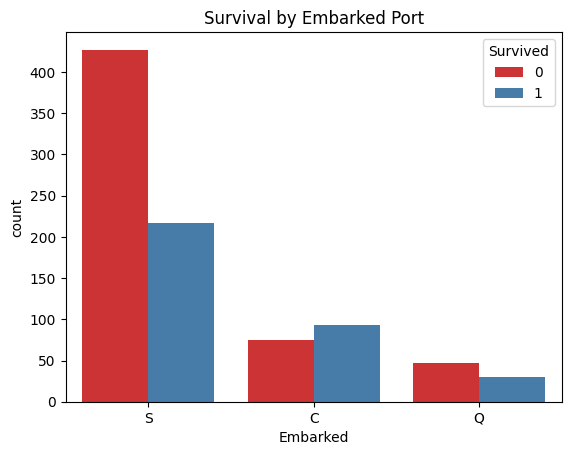

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [5]:
### Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train, palette="Set1")
plt.title('Survival by Embarked Port')
plt.show()

print(train.groupby('Embarked')['Survived'].mean())

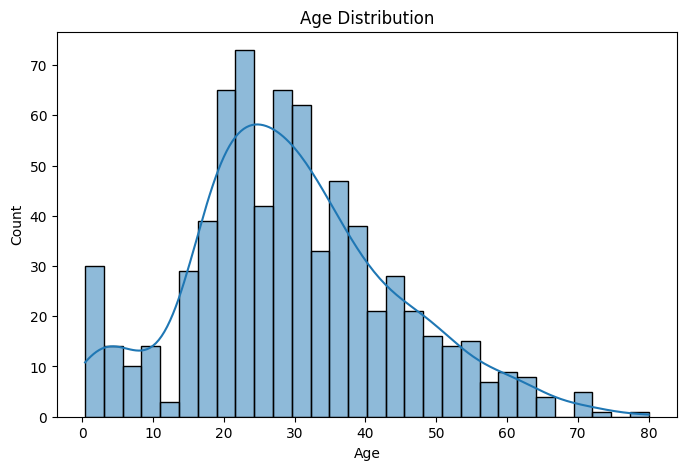

In [6]:
### Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

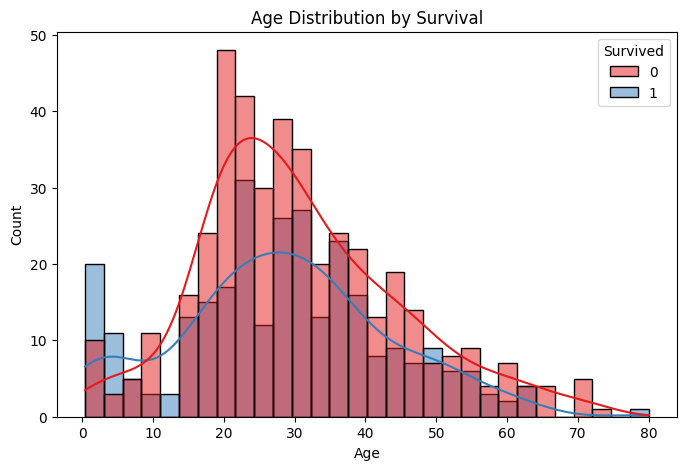

In [7]:
### Survival by Age
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True, palette="Set1")
plt.title('Age Distribution by Survival')
plt.show()

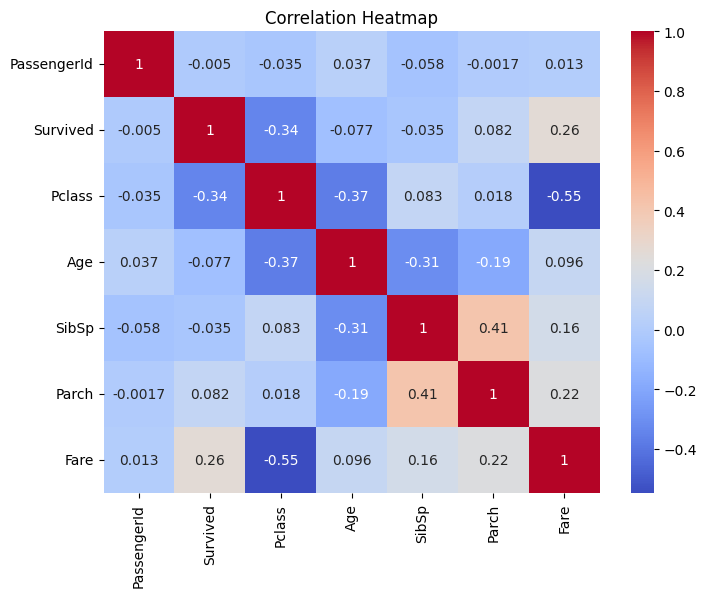

In [8]:
### Correlation Heatmap
corr = train.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
### Missing values in Train
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

print("Missing values in Train dataset:")
print(missing_train)

Missing values in Train dataset:
Cabin       687
Age         177
Embarked      2
dtype: int64


In [10]:
### Missing values in Test
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

print("\nMissing values in Test dataset:")
print(missing_test)


Missing values in Test dataset:
Cabin    327
Age       86
Fare       1
dtype: int64


###  Missing Values Analysis

**Train Data:**
- **Cabin:**  (≈77%) → high missing rate.
- **Age:**  (≈20%) → can impute.
- **Embarked:** (≈0.2%) → negligible.

**Test Data:**
- **Cabin:** (≈78%) → high missing rate.
- **Age:** (≈20%) → can impute.
- **Fare:** (≈0.2%) → simple imputation.

**Notes:**
- **Cabin:** drop or extract first letter as deck.
- **Age:** impute with median or by Pclass + Sex.
- **Embarked:** impute with mode.
- **Fare:** impute with median by Pclass.

# Feature Engineering

In [11]:
# Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False )
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False )

# Replace rare titles with 'Other'
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
train['Title'] = train['Title'].replace(rare_titles,'Other')
test['Title'] = test['Title'].replace(rare_titles,'Other')

# Family Size
train['FamilySize'] = train['SibSp'] + train['Parch'] +1
test['FamilySize'] = test['SibSp'] + test['Parch'] +1

# IsAlone
train['IsAlone'] = 0
train.loc[train['FamilySize']==1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize']==1, 'IsAlone'] = 1

#  Deck from Cabin
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

# Replace NaN decks with 'Unknown'
train['Deck'].fillna('Unknown', inplace=True)
test['Deck'].fillna('Unknown', inplace=True)

# Age bins
bins = [0,12,18,35,60,100]
labels = ['Child','Teen','Adult','MidAge','Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# Fare bins
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])


train[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare',
       'Title','FamilySize','IsAlone','Deck','AgeGroup','FareBand']].head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1982500546.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False )
/tmp/ipython-input-1982500546.py:3: SyntaxWarning: invalid escape sequence '\.'
  test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False )
/tmp/ipython-input-1982500546.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instea

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Deck,AgeGroup,FareBand
0,1,0,3,male,22.0,1,0,7.2500,Mr,2,0,Unknown,Adult,1
1,2,1,1,female,38.0,1,0,71.2833,Mrs,2,0,C,MidAge,4
2,3,1,3,female,26.0,0,0,7.9250,Miss,1,1,Unknown,Adult,2
3,4,1,1,female,35.0,1,0,53.1000,Mrs,2,0,C,Adult,4
4,5,0,3,male,35.0,0,0,8.0500,Mr,1,1,Unknown,Adult,2


In [12]:
# Target
y = train['Survived']

# Features
X = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)

# Test dataset
X_test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)


In [13]:
# Train/Validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Missing Handling

In [14]:
# Missing values in Train
print("Missing values in Train:")
print(X_train.isnull().sum())

# Missing values in Validation
print("\nMissing values in Validation:")
print(X_val.isnull().sum())

# Missing values in Test
print("\nMissing values in Test:")
print(X_test.isnull().sum())


Missing values in Train:
Pclass          0
Sex             0
Age           137
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
FamilySize      0
IsAlone         0
Deck            0
AgeGroup      137
FareBand        0
dtype: int64

Missing values in Validation:
Pclass         0
Sex            0
Age           40
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
Deck           0
AgeGroup      40
FareBand       0
dtype: int64

Missing values in Test:
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
FamilySize     0
IsAlone        0
Deck           0
AgeGroup      86
FareBand       1
dtype: int64


In [15]:
# Fill missing numeric values
# Age
age_median = X_train['Age'].median()
X_train['Age'].fillna(age_median, inplace=True)
X_val['Age'].fillna(age_median, inplace=True)
X_test['Age'].fillna(age_median, inplace=True)

# Fare
fare_median = X_train['Fare'].median()
X_train['Fare'].fillna(fare_median, inplace=True)
X_val['Fare'].fillna(fare_median, inplace=True)
X_test['Fare'].fillna(fare_median, inplace=True)

# Fill missing categorical values
# Embarked
embarked_mode = X_train['Embarked'].mode()[0]
X_train['Embarked'].fillna(embarked_mode, inplace=True)
X_val['Embarked'].fillna(embarked_mode, inplace=True)
X_test['Embarked'].fillna(embarked_mode, inplace=True)

# Re-create dependent features if needed
# AgeGroup
bins = [0,12,18,35,60,100]
labels = ['Child','Teen','Adult','MidAge','Senior']
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=bins, labels=labels)
X_val['AgeGroup'] = pd.cut(X_val['Age'], bins=bins, labels=labels)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

# FareBand
X_train['FareBand'] = pd.qcut(X_train['Fare'], 4, labels=[1,2,3,4])
X_val['FareBand'] = pd.qcut(X_val['Fare'], 4, labels=[1,2,3,4])
X_test['FareBand'] = pd.qcut(X_test['Fare'], 4, labels=[1,2,3,4])


/tmp/ipython-input-1089067230.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-1089067230.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [17]:
# Encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Binary columns
binary_cols = ['Sex', 'IsAlone']

# Multi-categorical columns
multi_cols = ['Embarked','Title','Deck','AgeGroup','FareBand']

# Label Encoding for binary columns
le = LabelEncoder()
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

# One-Hot Encoding for multi-categorical columns
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), multi_cols)
    ], remainder='passthrough'
)

X_train_enc = ct.fit_transform(X_train)
X_val_enc = ct.transform(X_val)
X_test_enc = ct.transform(X_test)

# Create DataFrames with proper column names
encoded_cols = ct.named_transformers_['onehot'].get_feature_names_out(multi_cols)
remaining_cols = [c for c in X_train.columns if c not in multi_cols]

X_train_enc = pd.DataFrame(X_train_enc, columns=list(encoded_cols) + remaining_cols)
X_val_enc = pd.DataFrame(X_val_enc, columns=list(encoded_cols) + remaining_cols)
X_test_enc = pd.DataFrame(X_test_enc, columns=list(encoded_cols) + remaining_cols)

# Check shapes
print("X_train_enc shape:", X_train_enc.shape)
print("X_val_enc shape:", X_val_enc.shape)
print("X_test_enc shape:", X_test_enc.shape)



X_train_enc shape: (712, 31)
X_val_enc shape: (179, 31)
X_test_enc shape: (418, 31)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Modeling

In [18]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_model.fit(X_train_enc, y_train)

# Prediction on Validation
y_val_pred = log_model.predict(X_val_enc)

# Performance evaluation
print("Logistic Regression Accuracy (Validation):", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


Logistic Regression Accuracy (Validation): 0.8379888268156425

Confusion Matrix:
[[97 13]
 [16 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [19]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train_enc, y_train)

# Prediction on Validation
y_val_pred_rf = rf_model.predict(X_val_enc)

# Performance evaluation
print("Random Forest Accuracy (Validation):", accuracy_score(y_val, y_val_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))


Random Forest Accuracy (Validation): 0.8044692737430168

Confusion Matrix:
[[96 14]
 [21 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## Submission

In [20]:
# Predict on Test dataset
y_test_pred = log_model.predict(X_test_enc)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv
